In [95]:
# Import necessary libraries
import anndata

data_path = "../../data/raw/test/gland_immune_atlas.h5ad"
# Load the dataset
adata = anndata.read_h5ad(data_path)
# Display basic information about the dataset
print(adata)

AnnData object with n_obs × n_vars = 6362 × 36306
    obs: 'celltype', 'sample_id', 'study', 'niche', 'donor_id', 'protocol_url', 'institute', 'sample_collection_site', 'sample_collection_relative_time_point', 'library_id', 'library_id_repository', 'author_batch_notes', 'organism_ontology_term_id', 'manner_of_death', 'sample_source', 'sex_ontology_term_id', 'sample_collection_method', 'tissue_type', 'sampled_site_condition', 'tissue_ontology_term_id', 'Region/Tooth #', 'sample_preservation_method', 'suspension_type', 'cell_enrichment', 'cell_viability_percentage', 'cell_number_loaded', 'sample_collection_year', 'assay_ontology_term_id', 'library_preparation_batch', 'library_sequencing_run', 'sequenced_fragment', 'sequencing_platform', 'is_primary_data', 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intron_inclusion', 'disease_ontology_term_id', 'ancestry', 'self_reported_ethnicity_ontology_term_id', 'age range', 'development_stage_ontology_term_id', 'cell_type_o

In [129]:
adata.uns["schema_version"]

'5.2.0'

In [96]:
# adata.var_names = adata.var["feature_id"]
# Force obs_names to be unique
adata.obs_names_make_unique()

# Force var_names to be unique
adata.var_names_make_unique()

In [97]:
adata.obs["batch"] = adata.obs["sample_id"]

In [98]:
import scvi

model_path = "../../data/models/2024-02-12-scvi-homo-sapiens/scvi.model/"
ref_genes = scvi.model.SCVI.prepare_query_anndata(adata, model_path, return_reference_var_names=True)

INFO     File ../../data/models/2024-02-12-scvi-homo-sapiens/scvi.model/model.pt already downloaded                


In [110]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ensembl_id,,,,,,
ENSG00000243485,False,MIR1302-2HG,NCBITaxon:9606,gene,623,lncRNA
ENSG00000237613,False,FAM138A,NCBITaxon:9606,gene,888,lncRNA
ENSG00000186092,False,OR4F5,NCBITaxon:9606,gene,2618,protein_coding
ENSG00000238009,False,ENSG00000238009.6,NCBITaxon:9606,gene,629,lncRNA
ENSG00000239945,False,ENSG00000239945.1,NCBITaxon:9606,gene,1319,lncRNA
...,...,...,...,...,...,...
ENSG00000277836,False,ENSG00000277836.1,NCBITaxon:9606,gene,288,protein_coding
ENSG00000278633,False,ENSG00000278633.1,NCBITaxon:9606,gene,2404,protein_coding
ENSG00000276017,False,ENSG00000276017.1,NCBITaxon:9606,gene,2404,protein_coding


In [114]:
import numpy as np
import pandas as pd

# get the intercept of ref_genes and adata.var_names
# Get the intersection of ref_genes and adata.var_names
intersect_genes = list(set(ref_genes).intersection(set(adata.var_names)))
print(f"Number of intersecting genes: {len(intersect_genes)}")
# add zeros to the remaining genes from ref_genes

# Create a new AnnData object with intersecting genes
adata_intersect = adata[:, intersect_genes].copy()

# Find the remaining genes in ref_genes that are not in intersect_genes
remaining_genes = list(set(ref_genes) - set(intersect_genes))

# Create a zero matrix for the remaining genes
zero_matrix = np.zeros((adata.shape[0], len(remaining_genes)))

# Create a new AnnData object for the remaining genes with zero values
adata_remaining = anndata.AnnData(X=zero_matrix, var=pd.DataFrame(index=remaining_genes))
adata_remaining.obs_names = adata_intersect.obs_names

Number of intersecting genes: 5723


In [115]:
new_adata = anndata.concat([adata_intersect, adata_remaining], axis=1)
new_adata.obs = adata.obs.copy()

/Users/mengerj/Library/Application Support/hatch/env/virtual/mmcontext/NDS_X2Wf/mmcontext/lib/python3.10/site-packages/anndata/_core/merge.py:1410: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [116]:
vae_q = scvi.model.SCVI.load_query_data(new_adata, model_path)

INFO     File ../../data/models/2024-02-12-scvi-homo-sapiens/scvi.model/model.pt already downloaded                


/Users/mengerj/Library/Application Support/hatch/env/virtual/mmcontext/NDS_X2Wf/mmcontext/lib/python3.10/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/Library/Application Support/hatch/env/virtual/mmcontext/NDS_X2Wf/mmcontext/lib/python3.10/site-packages/scvi/model/base/_archesmixin.py:105: UserWarning: `var_names` for the loaded `adata` does not match those of the `adata` used to train the model. For valid results, the former should match the latter.
  _validate_var_names(adata, var_names)
/Users/mengerj/Library/Application Support/hatch/env/virtual/mmcontext/NDS_X2Wf/mmcontext/lib/python3.10/site-packages/scvi/model/base/_archesmixin.py:110: UserWarning: `var_names` for the loaded `adata` do

In [117]:
vae_q.is_trained = True

In [120]:
latent = vae_q.get_latent_representation()
new_adata.obsm["X_scVI"] = latent

mmcontext.pl.plotting - INFO - Starting UMAP computation and plotting.
mmcontext.pl.plotting - INFO - Embedding key is None; using default neighbors.


/Users/mengerj/Library/Application Support/hatch/env/virtual/mmcontext/NDS_X2Wf/mmcontext/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 8000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


<Figure size 800x800 with 0 Axes>

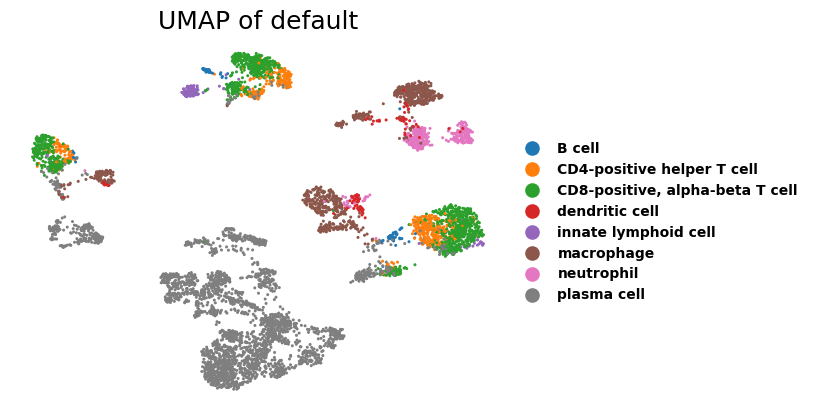

mmcontext.pl.plotting - INFO - Displayed UMAP plot interactively.


In [124]:
from mmcontext.pl.plotting import plot_umap

plot_umap(new_adata, color_key="cell_type", embedding_key=None)

ModuleNotFoundError: No module named 'cellxgene_census'